In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\WINDOWS 11\data_science\self-learn\DataSet\medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

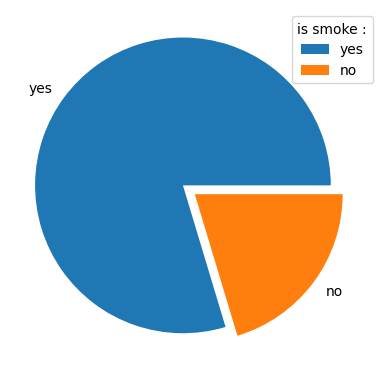

In [6]:
mylabel = list(df["smoker"].unique())
myexplode = [0.1,0]
plt.pie(df["smoker"].value_counts(), labels= mylabel, explode = myexplode)
plt.legend(title = "is smoke :")
plt.show()

In [7]:
df_as = df.drop(["bmi","smoker","region","children","charges"], axis=1)
df_as

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male
...,...,...
2767,47,female
2768,21,female
2769,19,male
2770,23,male


In [8]:
df_as = df_as.groupby(["age","sex"]).value_counts()
df_as = pd.DataFrame(df_as)
df_as

count
age sex          
18  female     68
    male       80
19  female     68
    male       74
20  female     28
...           ...
62  male       22
63  female     24
    male       22
64  female     22
    male       24

[94 rows x 1 columns]

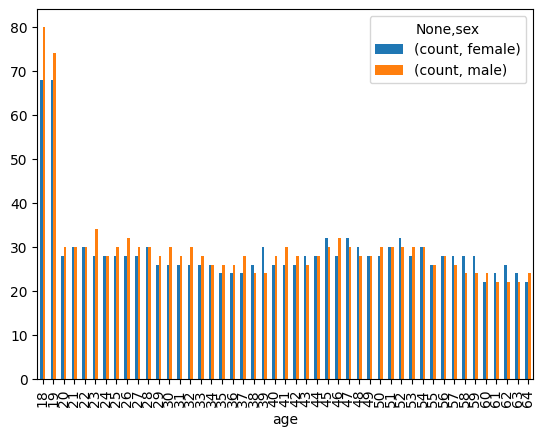

In [25]:
df_as.unstack().plot(kind='bar', legend=True)
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

x = df.drop(["charges"], axis=1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [38]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7609583878400353